<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / Assignment 3*

--- 

# Language Modeling with RNN



## Code

다음 링크는 LSTM을 사용하여 Spam 메시지 분류를 수행한 캐글 노트북입니다. => [Link](https://www.kaggle.com/kredy10/simple-lstm-for-text-classification) <br/>

위 노트북에서 사용한 코드를 참고하여<br/>
캐글 데이터셋인 [Women's E-Commerce Clothing Reviews](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) 를 분류해 보세요.

- 분류에 사용될 텍스트 데이터 : **`Review Text`** 열을 사용합니다.
- 레이블(label) 데이터 : **`Recommended IND`** 열을 사용합니다.

In [71]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

In [46]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [48]:
df = df.dropna()

### 1) 데이터 전처리
    
- 데이터셋을 데이터프레임으로 읽어옵니다.
- 필요없는 열(column)을 삭제합니다.

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


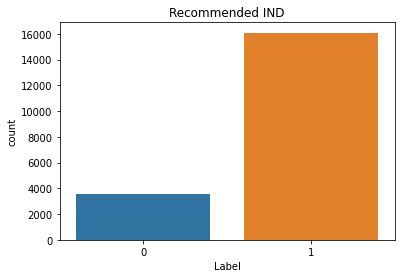

In [52]:
sns.countplot(df['Recommended IND'])
plt.xlabel('Label')
plt.title('Recommended IND');

In [77]:
# 데이터 전처리

max_words = 3000
max_len = 400  # 단어의 길이는 150개
tok = Tokenizer(num_words=max_words) 
tok.fit_on_texts(X_train) # tok 객체에 리뷰 토큰화해서 넣기 
sequences = tok.texts_to_sequences(X_train) # 문자를 시퀀스 형태로 변경 , 시퀀스 : 인덱스를 반환하는 객체
# 해설 쉽게 : https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html 
tok.word_index # 시퀀스는 word_dex에 적힌 대로 각 단어에 해당하는 번호를 호출
len(sequences)

15729

In [81]:
len(sequences)

15729

In [79]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len) # max_len 길이에 맞춰 padding 형성 

In [75]:
sequences_matrix.shape # 150 차원 15729개의 리뷰

(15729, 150)

In [83]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len]) # 열 : 150
     # inputdim : 최대 어휘 인덱스
     #outputdim : 임베딩의 차원
     # input_length : 입력시퀀스 길이 (15729, 150)
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer) # LSTM 적용
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [85]:
### 이곳에서 과제를 수행해 주세요 ###

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

### 2) 텍스트 분류를 수행해주세요.

- 데이터셋 split시 test_size의 비율은 20%로, `random_state = 42` 로 설정합니다. 
- Tokenizer의 `num_words=3000` 으로 설정합니다.
- pad_sequence의 `maxlen=400` 으로 설정합니다.
- 학습 시, 파라미터는 `batch_size=128, epochs=10, validation_split=0.2` 로 설정합니다.
- EarlyStopping을 적용합니다. 파라미터는 `monitor='val_loss',min_delta=0.0001, patience=3` 로 설정합니다.
- evaluate 했을 때의 loss와 accuarcy를 [loss, acc] 형태로 입력해주세요. Ex) [0.4321, 0.8765]

In [86]:
### 이곳에서 과제를 수행해 주세요 ###

X = df['Review Text']
Y = df['Recommended IND']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 


In [87]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=3)])

Epoch 1/10
99/99 [==============================] - 22s 198ms/step - loss: 0.3925 - accuracy: 0.8363 - val_loss: 0.2951 - val_accuracy: 0.8633
Epoch 2/10
99/99 [==============================] - 19s 191ms/step - loss: 0.2726 - accuracy: 0.8813 - val_loss: 0.3119 - val_accuracy: 0.8690
Epoch 3/10
99/99 [==============================] - 19s 192ms/step - loss: 0.2499 - accuracy: 0.8962 - val_loss: 0.2948 - val_accuracy: 0.8792
Epoch 4/10
99/99 [==============================] - 19s 193ms/step - loss: 0.2388 - accuracy: 0.9003 - val_loss: 0.2918 - val_accuracy: 0.8617
Epoch 5/10
99/99 [==============================] - 19s 191ms/step - loss: 0.2302 - accuracy: 0.9022 - val_loss: 0.2835 - val_accuracy: 0.8786
Epoch 6/10
99/99 [==============================] - 19s 192ms/step - loss: 0.2217 - accuracy: 0.9083 - val_loss: 0.3125 - val_accuracy: 0.8754
Epoch 7/10
99/99 [==============================] - 19s 192ms/step - loss: 0.2155 - accuracy: 0.9092 - val_loss: 0.2821 - val_accuracy: 0.8751

In [88]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [91]:
accr = model.evaluate(test_sequences_matrix,Y_test)

123/123 [==============================] - 3s 21ms/step - loss: 0.2835 - accuracy: 0.8815


In [92]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.283
  Accuracy: 0.882
